In [1]:
%matplotlib inline
import mpld3
mpld3.disable_notebook()

%load_ext autoreload

In [35]:
%autoreload
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle

from training_monitoring import plot_layer_rotation_rate_curves

In [13]:
# load the recordings that were made during training
def load_norms(task,weight_decay):
    wd = '_weight_decay' if weight_decay else ''
    with open('results/norm_memory_'+task+'_SGD'+wd+'.p','rb') as f:
        norms = pickle.load(f)
        grad_norms = np.array(norms['grad_norms'])
        weight_norms = np.array(norms['weight_norms'])
    return grad_norms,weight_norms

def load_rates(task,weight_decay):
    wd = '_weight_decay' if weight_decay else ''
    with open('results/layer_rotation_rates_'+task+'_SGD'+wd+'.p','rb') as f:
        layer_rotation_rates = pickle.load(f)
    return np.array(layer_rotation_rates)

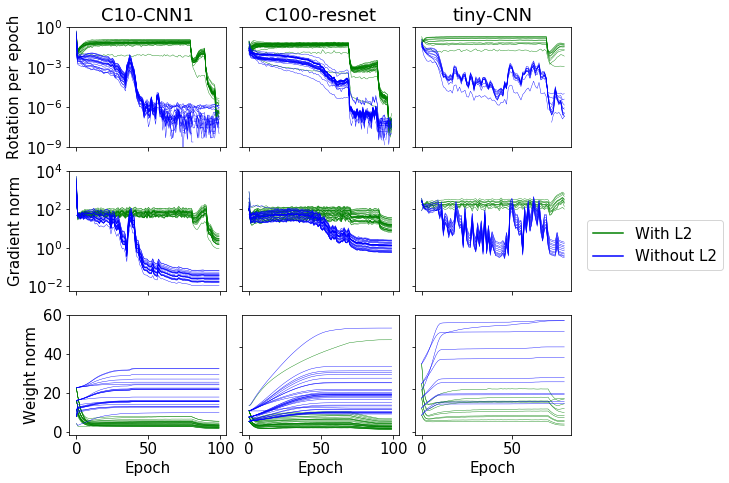

In [73]:
matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN']
colours = {True:'g',False:'b'}
f, axes = plt.subplots(len(tasks),3, figsize = (9,2.5*len(tasks)),sharey = 'row',sharex = 'col')
axes = np.array([axes]) if len(tasks) == 1 else axes
for i,task in enumerate(tasks):
    for weight_decay in [True,False]:
        grad_norms, weight_norms = load_norms(task,weight_decay)
        layer_rotation_rates = load_rates(task,weight_decay)
        for layer in range(grad_norms.shape[1]):
            axes[0,i].semilogy(np.arange(layer_rotation_rates.shape[0]), list(layer_rotation_rates[:,layer]), 
                               color = colours[weight_decay], linewidth = 0.4)
            axes[1,i].semilogy(range(grad_norms.shape[0]),grad_norms[:,layer],colours[weight_decay], linewidth = 0.4)
            axes[2,i].plot(range(weight_norms.shape[0]),weight_norms[:,layer],colours[weight_decay], linewidth = 0.4)
            
    axes[-1,i].set_xlabel('Epoch')
    axes[0,i].set_title(task)
            
o = axes[0,0].set_ylim([1e-9,1e0])
o = axes[0,0].set_yticks([1e-9,1e-6,1e-3,1e0])
o = axes[1,0].set_yticks([1e-2,1e0,1e2,1e4])
o = axes[2,0].set_yticks([0,20,40,60])

o = axes[0,0].set_ylabel('Rotation per epoch')
o = axes[1,0].set_ylabel('Gradient norm')
o = axes[2,0].set_ylabel('Weight norm')

#Create custom artists
simArtist = plt.Line2D((0,1),(0,0), color='g')
anyArtist = plt.Line2D((0,1),(0,0), color='b')
#Create legend from custom artist/label lists
axes[1,2].legend([simArtist,anyArtist],['With L2', 'Without L2'],bbox_to_anchor=(1.05,0.65))

plt.subplots_adjust(wspace=0.1,hspace = 0.2)
plt.savefig('figures/weight_decay_analysis.eps',format='eps', dpi=200, bbox_inches="tight")